In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

train_data = pd.read_csv('./Train.csv')
print("Shape of train_data:", train_data.shape)

Shape of train_data: (42000, 785)


In [3]:
X = train_data.iloc[:, 1:]  
y = train_data.iloc[:, 0]   

print("Shape of X after separating features:", X.shape)

Shape of X after separating features: (42000, 784)


In [4]:
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  
X = X.values / 255.0
X = X.reshape(-1, 28, 28, 1)
print("Shape of X after reshaping:", X.shape)

Shape of X after reshaping: (42000, 28, 28, 1)


In [5]:
y = to_categorical(y, num_classes=10)
print("Shape of y after one-hot encoding:", y.shape)

Shape of y after one-hot encoding: (42000, 10)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)

X_train shape: (33600, 28, 28, 1)


In [7]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1050/1050 [==============================] - 13s 9ms/step - loss: 0.2938 - accuracy: 0.9131 - val_loss: 0.1855 - val_accuracy: 0.9458
Epoch 2/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.1286 - accuracy: 0.9600 - val_loss: 0.1191 - val_accuracy: 0.9630
Epoch 3/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0870 - accuracy: 0.9730 - val_loss: 0.1082 - val_accuracy: 0.9664
Epoch 4/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0640 - accuracy: 0.9797 - val_loss: 0.1051 - val_accuracy: 0.9677
Epoch 5/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0504 - accuracy: 0.9834 - val_loss: 0.1089 - val_accuracy: 0.9687
Epoch 6/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.1119 - val_accuracy: 0.9696
Epoch 7/10
1050/1050 [==============================] - 9s 9ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.1094 - val_accura

263/263 [==============================] - 1s 5ms/step - loss: 0.1285 - accuracy: 0.9682
Validation Accuracy: 96.82%
Validation loss: 12.85%


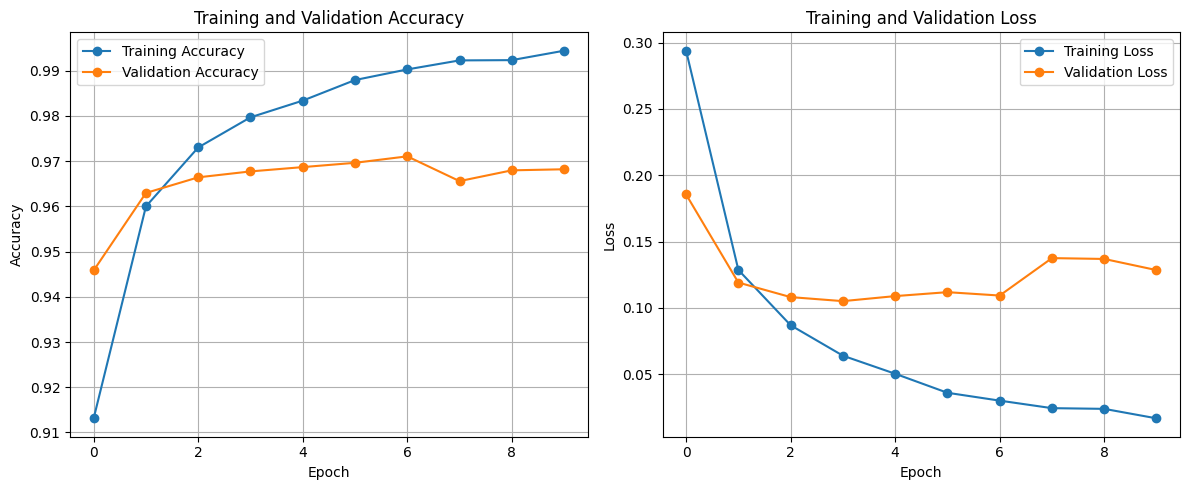

In [9]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation loss: {val_loss * 100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

175/175 [==============================] - 1s 6ms/step


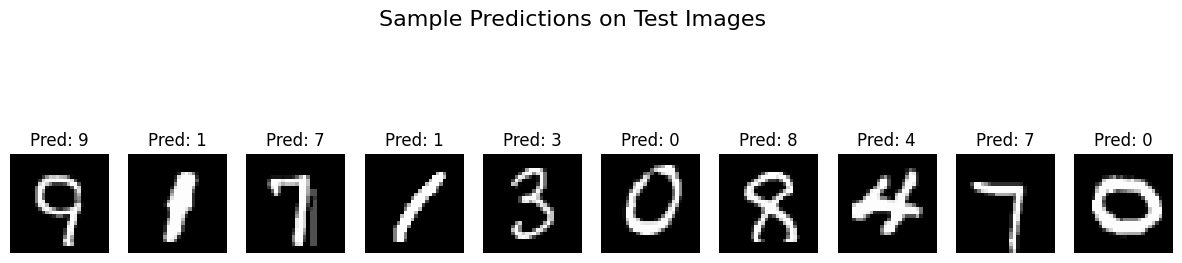

In [10]:
test_data = pd.read_csv('./test.csv')
test_images = test_data.values / 255.0
test_images = test_images.reshape(-1, 28, 28, 1)

    
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
num_samples = 10
plt.figure(figsize=(15, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions on Test Images", fontsize=16)
plt.show()

In [11]:
model.save('exp1.h5')